In [8]:
%store -r 

In [1]:
import os
import sys

sys.path.insert( 0, os.path.abspath("./utils") )


In [2]:
import time
from time import sleep
import json
from datetime import datetime
import numpy as np
import boto3
import pandas as pd

In [44]:
rerank_campaign_arn = "arn:aws:personalize:us-east-1:230755935769:campaign/aws-personalized-ranking-mb"

In [79]:
from elastic_search import esquery as q
query = "Kitchen"
field = "product_category"

awsauth = q.get_awsauth(elastic_search_endpoint)
rjson = q.query(elastic_search_endpoint, query, field, awsauth)
rjson

{'took': 21,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 3.8140416,
  'hits': [{'_index': 'product',
    '_type': 'product',
    '_id': 'ypymUXYBAiVFg570MgLd',
    '_score': 3.8140416,
    '_source': {'product_id': 'B004S129AQ',
     'product_category': 'Kitchen',
     'product_title': 'EasyLunchboxes 3-Compartment Bento Lunch Box Containers'}},
   {'_index': 'product',
    '_type': 'product',
    '_id': 'iXSmUXYB_l31ckDJPKud',
    '_score': 3.8140416,
    '_source': {'product_id': 'B00LBFUKIA',
     'product_category': 'Kitchen',
     'product_title': 'Vitamix Certified Reconditioned Standard Blender'}},
   {'_index': 'product',
    '_type': 'product',
    '_id': '-gimUXYBXrWQULofQX5I',
    '_score': 3.8140416,
    '_source': {'product_id': 'B002KNY23Q',
     'product_category': 'Kitchen',
     'product_title': 'Set of 4 - Small Pie Pan, Mini Tart Tin, 5 Inch Diameter'

In [80]:
from amz_review import data_proc 


rerank_user = 49240011
all_df = data_proc.get_user_history(rerank_user, ui_data, items_df)
all_df.head()

,ITEM_ID,USER_ID,EVENT_VALUE,TIMESTAMP,EVENT_TYPE,index,product_id,product_category,product_title
0,B00IP4FGDO,49240011,5,1426464000,rating,2032905,B00IP4FGDO,Health_&_Personal_Care,"Combat Source Kill Max Roach Killing Gel, 60 Grams Pack Of 2"
1,B000I62YR8,49240011,5,1380672000,rating,5172588,B000I62YR8,Health_&_Personal_Care,"Metamucil Fiber Therapy for Regularity, Fiber Supplement, 300 Capsules"
2,B008JC82BA,49240011,4,1377043200,rating,2954392,B008JC82BA,Wireless,"IC ICLOVER 10pcs Stylus Touch Screen Pen iPhone 8/7 Plus iPhone X, for Samsung Galaxy S8 S7 S6 Edge Plus S5 S4, iPad Tablet Sony PSP"
3,B00BN4YBOI,49240011,5,1440547200,rating,1467393,B00BN4YBOI,Digital_Video_Download,Lewis Black: Stark Raving Black
4,B001PNHWFC,49240011,5,1424044800,rating,89761,B001PNHWFC,Kitchen,Ikea Cork Trivet


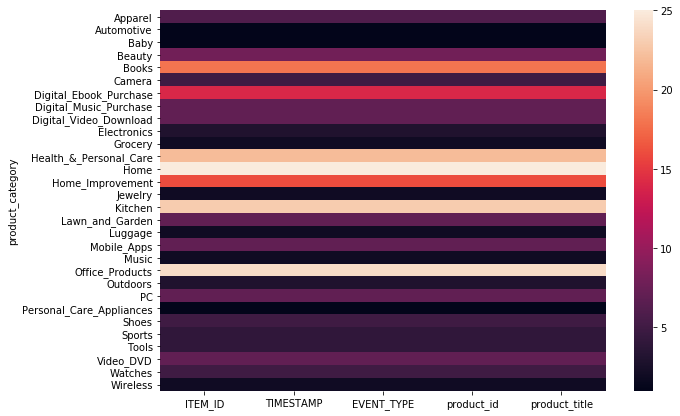

In [74]:
data_proc.plot_heat_map(all_df)

In [81]:
all_df[all_df['product_category']=="Kitchen"]

,ITEM_ID,USER_ID,EVENT_VALUE,TIMESTAMP,EVENT_TYPE,index,product_id,product_category,product_title
4,B001PNHWFC,49240011,5,1424044800,rating,89761,B001PNHWFC,Kitchen,Ikea Cork Trivet
8,B003STEIYY,49240011,5,1400025600,rating,1685578,B003STEIYY,Kitchen,"American Weigh Scales ACP-200 Digital Pocket Scale, 200 by 0.01 G"
15,B00COZ4OCY,49240011,5,1440547200,rating,507045,B00COZ4OCY,Kitchen,"Libbey 4-Piece Impressions Double Old Fashioned Glasses, 12-Ounce, Clear"
23,B000PYISIW,49240011,5,1383696000,rating,413839,B000PYISIW,Kitchen,"Cuisinart TOB-155 Toaster Oven Broiler, Stainless/Black"
24,B00H8U93JO,49240011,5,1424044800,rating,180228,B00H8U93JO,Kitchen,"New Star Foodservice 58147 Slimline Pattern, Stainless Steel, Teaspoon, 6-Inch, Set of 12"
25,B0035RRQCA,49240011,5,1424044800,rating,946159,B0035RRQCA,Kitchen,"Fox Run 4441 Square Cork Trivets, 7-Inch, Set of 3"
26,B00SAGIAB2,49240011,5,1440547200,rating,1745151,B00SAGIAB2,Kitchen,Dimple Stein Beer Mug - 19.00 Oz (4)
27,B004QPWKLM,49240011,5,1408579200,rating,2206302,B004QPWKLM,Kitchen,"All-Clad T231 Stainless Steel Cook Serving Fork, Silver"
28,B00JFGLJ3C,49240011,5,1408579200,rating,4214549,B00JFGLJ3C,Kitchen,"Lodge SCRAPERPK Durable Polycarbonate Pan Scrapers, Red and Black"
35,B005YR0F40,49240011,5,1432771200,rating,1101647,B005YR0F40,Kitchen,Bonavita Variable Temperature


In [82]:
personalize_runtime = boto3.client('personalize-runtime')

items_from_search = [] 
for h in rjson['hits']['hits']:
    items_from_search.append(h['_source']['product_id'])

get_recommendations_response_rerank = personalize_runtime.get_personalized_ranking(
    campaignArn = rerank_campaign_arn,
    userId = str(rerank_user),
    inputList = items_from_search
)

get_recommendations_response_rerank
    

{'ResponseMetadata': {'RequestId': '3a909b8d-1e2e-4c57-b6fb-511f5c33908c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/json',
   'date': 'Wed, 30 Dec 2020 00:36:31 GMT',
   'x-amzn-requestid': '3a909b8d-1e2e-4c57-b6fb-511f5c33908c',
   'content-length': '6005',
   'connection': 'keep-alive'},
  'RetryAttempts': 0},
 'personalizedRanking': [{'itemId': 'B00004SPZV', 'score': 0.0811929},
  {'itemId': 'B00KTOUZ66', 'score': 0.0545978},
  {'itemId': 'B001QTVT4A', 'score': 0.0472001},
  {'itemId': 'B00LN810PM', 'score': 0.0442897},
  {'itemId': 'B008AWCI8M', 'score': 0.0413998},
  {'itemId': 'B006IT9ZSU', 'score': 0.0405761},
  {'itemId': 'B00EO1AQUU', 'score': 0.0309727},
  {'itemId': 'B00004UE89', 'score': 0.0309513},
  {'itemId': 'B00194ETQC', 'score': 0.030092},
  {'itemId': 'B004CYELOQ', 'score': 0.0297663},
  {'itemId': 'B00NGV4E1G', 'score': 0.0295978},
  {'itemId': 'B00IZ1YHZK', 'score': 0.0284888},
  {'itemId': 'B0007NIIOK', 'score': 0.0276308},
  {'itemI

In [83]:
rerank_list = []
for item in items_from_search:
    product = data_proc.get_product_by_id(item, items_df)
    rerank_list.append(product)
rerank_df = pd.DataFrame(rerank_list)
rerank_df

,0,1
0,EasyLunchboxes 3-Compartment Bento Lunch Box Containers,Kitchen
1,Vitamix Certified Reconditioned Standard Blender,Kitchen
2,"Set of 4 - Small Pie Pan, Mini Tart Tin, 5 Inch Diameter",Kitchen
3,OXO Good Grips Silicone Pastry Brush,Kitchen
4,"Le Creuset Enameled Cast-Iron 9-3/4-Inch Square Roast/Bake Pan, Dune",Kitchen
5,Set of 4 16oz Pure White Porcelain Coffee Mugs,Kitchen
6,"Smart Weigh Digital Pro Pocket Scale with Back-Lit LCD Display, Silver",Kitchen
7,"kate spade new york Melamine Coaster Set, Raise a Glass",Kitchen
8,Kitchen Details Dish Drying Mat - Microfiber and Silicone Drying Mats Available,Kitchen
9,Microplane Artisan Fine Grater,Kitchen


In [84]:

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
compare_df = data_proc.compare_personalized_result(rerank_df, get_recommendations_response_rerank, items_df)
compare_df 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,0,1,Personalized Product title,Product Category
0,EasyLunchboxes 3-Compartment Bento Lunch Box Containers,Kitchen,Misto Brushed Aluminum Olive Oil Sprayer,Kitchen
1,Vitamix Certified Reconditioned Standard Blender,Kitchen,QRP Wide Mouth Mason Jar Fermenting Food Fermentation Kits Lids Caps Crocks Weights Sauerkraut Kimchi Pickling,Kitchen
2,"Set of 4 - Small Pie Pan, Mini Tart Tin, 5 Inch Diameter",Kitchen,OXO Good Grips Green Spinner,Kitchen
3,OXO Good Grips Silicone Pastry Brush,Kitchen,Glasslock 18-Piece Oven Safe Container Set,Kitchen
4,"Le Creuset Enameled Cast-Iron 9-3/4-Inch Square Roast/Bake Pan, Dune",Kitchen,EZ-DUZ-IT Deluxe Can Opener with Red Grips,Kitchen
5,Set of 4 16oz Pure White Porcelain Coffee Mugs,Kitchen,OXO Good Grips Salt Shaker,Kitchen
6,"Smart Weigh Digital Pro Pocket Scale with Back-Lit LCD Display, Silver",Kitchen,"Oster VERSA Pro Performance Blender with Tamper 1400-watt, BLSTVB-RV0",Kitchen
7,"kate spade new york Melamine Coaster Set, Raise a Glass",Kitchen,Norpro Spaetzle Maker,Kitchen
8,Kitchen Details Dish Drying Mat - Microfiber and Silicone Drying Mats Available,Kitchen,Vita-Mix Tritan Copolyester Containers with Wet Blade and Lid,Kitchen
9,Microplane Artisan Fine Grater,Kitchen,Wilton 2105-1620 6 Cavity Nonstick Donut Pans 2 Pack,Kitchen


In [18]:
import pickle 
f = open('ranking_model.pkl', 'rb')
model = pickle.load(f)
model

Pipeline(memory=None,
         steps=[('svd',
                 TruncatedSVD(algorithm='randomized', n_components=400,
                              n_iter=5, random_state=None, tol=0.0)),
                ('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gbdt',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fractio

In [53]:
from bert import encode 
encoder = encode.Encoder(gpu=1)

In [85]:
from elastic_search import esquery as q
query = "shoes"
field = "product_title"


awsauth = q.get_awsauth(elastic_search_endpoint)
rjson = q.query(elastic_search_endpoint, query, field, awsauth)
rjson

{'took': 18,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 9.366618,
  'hits': [{'_index': 'product',
    '_type': 'product',
    '_id': 'H-G5VnYBWQlvJU18C6GA',
    '_score': 9.366618,
    '_source': {'product_id': '0688161669',
     'product_category': 'Books',
     'product_title': 'Shoes, Shoes, Shoes (Mulberry Books)'}},
   {'_index': 'product',
    '_type': 'product',
    '_id': 'JOcLWXYBWQlvJU18N6fA',
    '_score': 9.158841,
    '_source': {'product_id': 'B00SUB9OF8',
     'product_category': 'Shoes',
     'product_title': 'Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Water Shoes Triangle'}},
   {'_index': 'product',
    '_type': 'product',
    '_id': 'q1z-XHYB7ZcjQTgaI2ah',
    '_score': 8.742775,
    '_source': {'product_id': 'B00UV790DU',
     'product_category': 'Shoes',
     'product_title': '20to30 New Water Skin Shoes Aqua Shoes Fitn

In [86]:
queries = [] 
products = []
ids = [] 
to_transform = [] 
for i, r in enumerate(rjson['hits']['hits']): 
    ids.append(r['_source']['product_id'])
    queries.append(query)
    products.append(r['_source']['product_title'])
    to_transform.append([r['_source']['product_id'],r['_source']['product_title']])


In [87]:
features = encoder.to_q_p_bert_embeddings(queries, products)
preds = model.predict(features)

In [88]:
for i, p in enumerate(preds): 
    to_transform[i].append(p)
    
reranked_result = sorted(to_transform, key=lambda x:x[2], reverse=True)    
reranked_result    

[['B00N4K858M',
  'Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XXL Size',
  3.6421999160456258],
 ['B00N4K83MU',
  'Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XL Size',
  3.6105151523850494],
 ['B0058HE96G', 'Native Shoes Howard Shoes Brown M4_W6', 3.605172648143332],
 ['B00QJFNW6E',
  "Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",
  3.536212136065592],
 ['B00QJFNW6E',
  "Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",
  3.536212136065592],
 ['B00SZM0NSY',
  'Brown Crochet Barefoot Sandals Foot Jewelry Handmade Beach Wedding Shoes Nude Shoes Sexy Yoga Shoes Lace Crocheted Shoes Summer Shoes',
  3.530278210317089],
 ['B00J2HXP6S',
  'Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Zebra Yellow (V2) XS Size',
  3.510597764555553],
 ['B004018ODA',
  'Cute Gothic Shoes Platform Mary Jane Shoes Army Military Shoes

In [89]:
relevant_list = list(filter(lambda x: (x[2]>3.2), reranked_result))
relevant_ids = [x[0] for x in relevant_list]

In [90]:
personalize = boto3.client('personalize')
personalize_runtime = boto3.client('personalize-runtime')

get_recommendations_response_rerank = personalize_runtime.get_personalized_ranking(
    campaignArn = rerank_campaign_arn,
    userId = str(rerank_user),
    inputList = relevant_ids
)

# get_recommendations_response_rerank
    

In [91]:
relavance_list = []
for item in relevant_ids:
    product = data_proc.get_product_by_id(item, items_df)
    relavance_list.append(product)
relavance_df = pd.DataFrame(relavance_list, columns = ['Relevant Product title','Product Category'])

In [64]:
original_list = []
for item in ids:
    product = data_proc.get_product_by_id(item, items_df)
    original_list.append(product)
original_df = pd.DataFrame(original_list, columns = ['Product title','Product Category'])

In [65]:
to_rerank_df = pd.concat([original_df[:relavance_df.shape[0]], relavance_df], axis=1)


In [66]:
data_proc.compare_personalized_result(to_rerank_df, get_recommendations_response_rerank, items_df)

,Product title,Product Category,Relevant Product title,Product Category,Personalized Product title,Product Category
0,"Shoes, Shoes, Shoes (Mulberry Books)",Books,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XXL Size,Shoes,SUIEK Unisex Baby Infant Swim Shoes Water Shoes Beach Shoes,Sports
1,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Water Shoes Triangle,Shoes,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XL Size,Shoes,"American Girl Shoes, 18 Inch Doll Shoes, WHITE CANVAS SHOES SANDALS",Toys
2,20to30 New Water Skin Shoes Aqua Shoes Fitness Shoes Yoga Shoes Pool Beach Swim Shoes,Shoes,Native Shoes Howard Shoes Brown M4_W6,Shoes,SUIEK Unisex Baby Infant Swim Shoes Water Shoes Beach Shoes,Sports
3,20to30 New Water Skin Shoes Aqua Shoes Fitness Shoes Yoga Shoes Pool Beach Swim Shoes,Shoes,"Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",Shoes,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XXL Size,Shoes
4,Your Shoes My Shoes: We All Love Shoes!,Digital_Ebook_Purchase,"Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",Shoes,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XL Size,Shoes
5,Your Shoes My Shoes: We All Love Shoes!,Books,Brown Crochet Barefoot Sandals Foot Jewelry Handmade Beach Wedding Shoes Nude Shoes Sexy Yoga Shoes Lace Crocheted Shoes Summer Shoes,Home,Native Shoes Howard Shoes Brown M4_W6,Shoes
6,"Springbok ""Shoes! Shoes! Shoes!"" 2000 Piece Jigsaw Puzzle",Toys,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Zebra Yellow (V2) XS Size,Shoes,"Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",Shoes
7,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Leaf Green (V2) L Size,Shoes,Cute Gothic Shoes Platform Mary Jane Shoes Army Military Shoes Bullets Hardware,Shoes,"Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (7, Medium)",Shoes
8,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Pink (V2) S Size,Shoes,"Vionic Women's Shoes Mules Kristin Orthotic Shoes Red Comfort Shoes (8, Medium)",Shoes,Brown Crochet Barefoot Sandals Foot Jewelry Handmade Beach Wedding Shoes Nude Shoes Sexy Yoga Shoes Lace Crocheted Shoes Summer Shoes,Home
9,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Wing Black (V2) XL Size,Shoes,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Leaf Green (V2) L Size,Shoes,Ballop Actos Aqua Shoes Skin Shoes Fitness Shoes Swim Shoes Yoga Shoes Zebra Yellow (V2) XS Size,Shoes
